# Titans vs Jaguars Week 14

# Introduction

Do an animation of the Titans longest pass play during the 2018 season.

Main focus:
* Have the animation of players circle moving around the field

Additional:
* Have arrows showing which way each player is moving
* Read about field control and what it accomplishes ([Big Data Bowl Submission](https://www.kaggle.com/adamsonty/nfl-big-data-bowl-a-basic-field-control-model))

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)

In [84]:
games = pd.read_csv("games.csv")
print(games.shape)
print(games.columns)
games.head()

(253, 6)
Index(['gameId', 'gameDate', 'gameTimeEastern', 'homeTeamAbbr',
       'visitorTeamAbbr', 'week'],
      dtype='object')


,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
0,2018090600,09/06/2018,20:20:00,PHI,ATL,1
1,2018090901,09/09/2018,13:00:00,CLE,PIT,1
2,2018090902,09/09/2018,13:00:00,IND,CIN,1
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
4,2018090900,09/09/2018,13:00:00,BAL,BUF,1


I know I want to visualize a big play from the Titans' 2018 season, but I do not know from which game I want to choose. Thus, I will just see who they played in this season and go from there.

In [85]:
titans_schedule = games[(games['homeTeamAbbr']=='TEN') | (games['visitorTeamAbbr']=='TEN')]
titans_schedule

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
3,2018090903,09/09/2018,13:00:00,MIA,TEN,1
21,2018091607,09/16/2018,13:00:00,TEN,HOU,2
32,2018092304,09/23/2018,13:00:00,JAX,TEN,3
52,2018093007,09/30/2018,13:00:00,TEN,PHI,4
62,2018100700,10/07/2018,13:00:00,BUF,TEN,5
87,2018101411,10/14/2018,16:25:00,TEN,BAL,6
91,2018102100,10/21/2018,09:30:00,LAC,TEN,7
130,2018110500,11/05/2018,20:15:00,DAL,TEN,9
139,2018111108,11/11/2018,13:00:00,TEN,NE,10
150,2018111804,11/18/2018,13:00:00,IND,TEN,11


Now I will try to find a big play from the Titans in 2018. This data is from the big data bowl which focused on how well defenders played the pass so the big play will have to be a pass play. I will see what results I get for pass plays greater than 50 yards.

In [86]:
plays = pd.read_csv("plays.csv")
print(plays.shape)
print(plays.columns)
plays.head()

(19239, 27)
Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,I_FORM,"2 RB, 1 TE, 2 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,SINGLEBACK,"1 RB, 1 TE, 3 WR",7.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,SHOTGUN,"2 RB, 1 TE, 2 WR",6.0,4.0,"4 DL, 2 LB, 5 DB",TRADITIONAL,0.0,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,5.0,"4 DL, 1 LB, 6 DB",SCRAMBLE_ROLLOUT_LEFT,0.0,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,SHOTGUN,"2 RB, 3 TE, 0 WR",8.0,6.0,"6 DL, 3 LB, 2 DB",TRADITIONAL,0.0,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [87]:
titans_big = plays[(plays['possessionTeam']=='TEN') & (plays['offensePlayResult']>50)]
print(titans_big.shape)
print(titans_big.loc[:,'playDescription'].iloc[0])
titans_big.sort_values(by='offensePlayResult', ascending=False)

(4, 27)
(10:00) (Punt formation) K.Byard pass deep right to D.Cruikshank for 66 yards, TOUCHDOWN.


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,offenseFormation,personnelO,defendersInTheBox,numberOfPassRushers,personnelD,typeDropback,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
1647,2018091607,329,(10:00) (Punt formation) K.Byard pass deep rig...,1,4,6,TEN,play_type_pass,TEN,34,NaN,"0 RB, 2 TE, 0 WR,1 P,3 LB,1 LS,4 DB",NaN,5.0,"0 DL, 3 LB, 4 DB, 3 RB,1 QB",UNKNOWN,0.0,0.0,10:00:00,44.0,NaN,NaN,C,66,66,8.397043,False
12866,2018112600,377,(9:31) M.Mariota pass short middle to J.Smith ...,1,2,2,TEN,play_type_pass,TEN,39,SINGLEBACK,"1 RB, 3 TE, 1 WR",7.0,5.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,3.0,0.0,09:31:00,71.0,NaN,NaN,C,61,61,5.446971,False
13778,2018120211,3538,(7:22) (Shotgun) M.Mariota pass deep left to T...,4,1,10,TEN,play_type_pass,TEN,35,SHOTGUN,"1 RB, 1 TE, 3 WR",7.0,4.0,"2 DL, 4 LB, 5 DB",TRADITIONAL,22.0,16.0,07:22:00,45.0,NaN,NaN,C,55,55,3.340939,False
4081,2018093007,3138,(7:55) M.Mariota pass deep middle to C.Davis t...,4,1,10,TEN,play_type_pass,TEN,25,SINGLEBACK,"1 RB, 2 TE, 2 WR",8.0,4.0,"4 DL, 3 LB, 4 DB",TRADITIONAL,17.0,13.0,07:55:00,35.0,NaN,NaN,C,51,51,2.971368,False


The longest pass play that the Titans had in the 2018 season was from a fake punt. This is about to get weird because this will look interesting in the animation. That's great! Now I need to get the information about the week from which it happened.

In [88]:
game_num = titans_big['gameId'].iloc[0]

titans_schedule[titans_schedule['gameId']==game_num]

,gameId,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,week
21,2018091607,09/16/2018,13:00:00,TEN,HOU,2


This play happened in week 2, so I will be using the week 2 data set and filtering by the game and play ID number to get all of the frames for this play.

In [89]:
wk2 = pd.read_csv("week2.csv")
wk2.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-14T00:23:24.700Z,29.73,26.60,0.00,0.00,0.00,81.40,98.80,None,382.0,Joe Flacco,5.0,QB,1,away,2018091300,60,right,NaN
1,2018-09-14T00:23:24.700Z,33.93,18.95,0.00,0.00,0.00,93.25,10.24,None,71269.0,Michael Crabtree,15.0,WR,1,away,2018091300,60,right,IN
2,2018-09-14T00:23:24.700Z,35.95,7.00,0.04,0.03,0.01,286.14,136.27,None,2533060.0,Dre Kirkpatrick,27.0,CB,1,home,2018091300,60,right,NaN
3,2018-09-14T00:23:24.700Z,44.51,36.03,0.77,0.67,0.08,264.78,322.29,None,2539233.0,Shawn Williams,36.0,SS,1,home,2018091300,60,right,NaN
4,2018-09-14T00:23:24.700Z,37.79,14.66,0.28,0.53,0.03,268.29,255.08,None,2543474.0,Darqueze Dennard,21.0,CB,1,home,2018091300,60,right,NaN


In [90]:
fk_punt = wk2[wk2['playId']==329]
play_direction = fk_punt['playDirection'].iloc[0]
print(fk_punt.shape)
fk_punt.head()

(2277, 19)


,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
134205,2018-09-16T17:13:17.099Z,42.38,28.55,0.11,0.06,0.01,54.13,171.81,None,2354.0,Wesley Woodyard,59.0,ILB,1,home,2018091607,329,right,NaN
134206,2018-09-16T17:13:17.099Z,30.10,29.50,0.12,0.06,0.02,80.53,143.28,None,4263.0,Brett Kern,6.0,P,1,home,2018091607,329,right,NaN
134207,2018-09-16T17:13:17.099Z,45.38,26.99,0.68,0.23,0.08,272.12,64.71,None,1037347.0,Joe Webb,5.0,QB,1,away,2018091607,329,right,NaN
134208,2018-09-16T17:13:17.099Z,42.13,31.77,0.22,0.10,0.04,90.18,212.48,None,2495234.0,Luke Stocker,88.0,TE,1,home,2018091607,329,right,NaN
134209,2018-09-16T17:13:17.099Z,44.96,24.16,0.12,0.02,0.02,281.44,230.85,None,2495251.0,Shareece Wright,43.0,CB,1,away,2018091607,329,right,NaN


I am just going to plot the first frame to see what the formation looks like for both teams.

(23, 19)


<ipython-input-91-cfc795f69b83>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1['teamName'] = teamName


<AxesSubplot:xlabel='x', ylabel='y'>

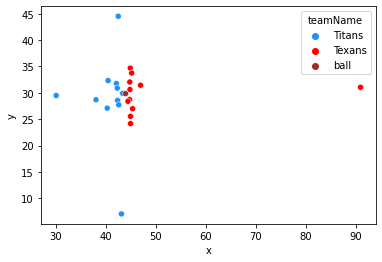

In [91]:
frame1 = fk_punt[fk_punt['frameId']==1]
print(frame1.shape)

teamName = []
for i in frame1['team']:
    if i == 'home':
        teamName.append('Titans')
    elif i == 'away':
        teamName.append('Texans')
    else:
        teamName.append('ball')
        
frame1['teamName'] = teamName 

sns.scatterplot(data=frame1, x='x', y='y', hue='teamName',palette=['dodgerblue', 'red', 'brown'])

Sonty's [Big Data Bowl Submission](https://www.kaggle.com/adamsonty/nfl-big-data-bowl-a-basic-field-control-model) brings up the fact that x and y coordinates are cartesian while directional coordinates (`s`, `dir`) are polar.

In [92]:
import math
dir_rad = (fk_punt['dir']*np.pi/180)
v_x = (np.sin(dir_rad)*fk_punt['s'])
v_y = (np.cos(dir_rad)*fk_punt['s'])
v_theta = np.arctan(v_y/v_x)
for i in v_theta:
    if np.isnan(i):
        v_theta = 0

fk_punt['v_theta'] = v_theta
fk_punt['v_x'] = v_x
fk_punt['v_y'] = v_y

fk_punt.head()

<ipython-input-92-cc57b585a3b4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fk_punt['v_theta'] = v_theta
<ipython-input-92-cc57b585a3b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fk_punt['v_x'] = v_x
<ipython-input-92-cc57b585a3b4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route,v_theta,v_x,v_y
134205,2018-09-16T17:13:17.099Z,42.38,28.55,0.11,0.06,0.01,54.13,171.81,None,2354.0,Wesley Woodyard,59.0,ILB,1,home,2018091607,329,right,NaN,0,0.015670,-0.108878
134206,2018-09-16T17:13:17.099Z,30.10,29.50,0.12,0.06,0.02,80.53,143.28,None,4263.0,Brett Kern,6.0,P,1,home,2018091607,329,right,NaN,0,0.071749,-0.096188
134207,2018-09-16T17:13:17.099Z,45.38,26.99,0.68,0.23,0.08,272.12,64.71,None,1037347.0,Joe Webb,5.0,QB,1,away,2018091607,329,right,NaN,0,0.614827,0.290496
134208,2018-09-16T17:13:17.099Z,42.13,31.77,0.22,0.10,0.04,90.18,212.48,None,2495234.0,Luke Stocker,88.0,TE,1,home,2018091607,329,right,NaN,0,-0.118141,-0.185587
134209,2018-09-16T17:13:17.099Z,44.96,24.16,0.12,0.02,0.02,281.44,230.85,None,2495251.0,Shareece Wright,43.0,CB,1,away,2018091607,329,right,NaN,0,-0.093059,-0.075762


# Animation

First, I will draw the field. Code is from Rob Mulla's [Big Data Bowl Submission](https://www.kaggle.com/robikscube/nfl-big-data-bowl-plotting-player-position).

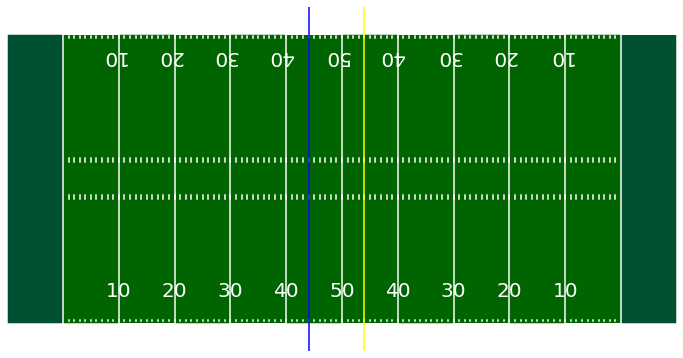

In [143]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33),
                         yards_left=10):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    field_height = 160/3
    field_width = 120
    rect = patches.Rectangle((0, 0), field_width, field_height, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    # major lines
    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
        
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    
    # yard numbers
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    # hashmarks
    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        '''hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='blue')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='blue')
        hf = highlight_line_number + yards_left
        plt.plot([hf, hf], [0, 53.3], color='yellow')
        '''
        plt.axvline(x=highlight_line_number+10, color='blue')
        plt.axvline(x=highlight_line_number + yards_left+10, color='yellow')
        
    return fig, ax

create_football_field(highlight_line=True,
                          highlight_line_number=titans_big['yardlineNumber'].iloc[0]+10)
plt.show()

34

In [94]:
if play_direction == 'right':
    line_of_scrimmage = titans_big['absoluteYardlineNumber'].iloc[0] + 10
    to_go_line = line_of_scrimmage + titans_big['yardsToGo'].iloc[0]
else:
    line_of_scrimmage = 120 - titans_big['absoluteYardlineNumber'].iloc[0]
    to_go_line = line_of_scrimmage - titans_big['yardsToGo'].iloc[0]

In [95]:
# move the players up 10 yds to match the field
for i in range(len(frame1['x'])):
    frame1['x'].iloc[i] +=10 
    
# make the changes in the whole df
for i in range(len(fk_punt['x'])):
    fk_punt['x'].iloc[i] +=10 

C:\Users\19012\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-95-8f4c1709937c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame1['x'].iloc[i] +=10
<ipython-input-95-8f4c1709937c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fk_punt['x'].iloc[i] +=10


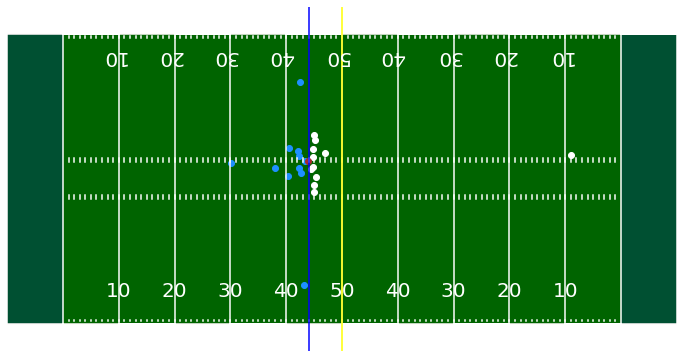

In [144]:
fig, ax = create_football_field()

titans = frame1[frame1['teamName']=='Titans']
ax.scatter(data=titans, x='x',y='y', c='dodgerblue')

texans = frame1[frame1['teamName']=='Texans']
ax.scatter(data=texans, x='x',y='y', c='white')

ball = frame1[frame1['teamName']=='ball']
ax.scatter(data=ball, x='x',y='y', c='brown')

plt.axvline(x=line_of_scrimmage, color='blue')
plt.axvline(x=to_go_line, color='yellow')

In [145]:
import math
def calculate_dx_dy_arrow(x, y, angle, speed, multiplier):
    if angle <= 90:
        angle = angle
        dx = np.sin(math.radians(angle)) * multiplier * speed
        dy = np.cos(math.radians(angle)) * multiplier * speed
        return dx, dy
    if angle > 90 and angle <= 180:
        angle = angle - 90
        dx = np.sin(math.radians(angle)) * multiplier * speed
        dy = -np.cos(math.radians(angle)) * multiplier * speed
        return dx, dy
    if angle > 180 and angle <= 270:
        angle = angle - 180
        dx = -(np.sin(math.radians(angle)) * multiplier * speed)
        dy = -(np.cos(math.radians(angle)) * multiplier * speed)
        return dx, dy
    if angle > 270 and angle <= 360:
        angle = 360 - angle
        dx = -np.sin(math.radians(angle)) * multiplier * speed
        dy = np.cos(math.radians(angle)) * multiplier * speed
        return dx, dy
    
        
def animate_player_movement(weekNumber, playId, gameId):
    weekData = wk2
    playData = titans_big
    
    playHome = fk_punt[fk_punt['team']=='home']
    playAway = fk_punt[fk_punt['team']=='away']
    playFootball = fk_punt[fk_punt['team']=='football']
    
    playHome['time'] = playHome['time'].apply(lambda x: dateutil.parser.parse(x).timestamp()).rank(method='dense')
    playAway['time'] = playAway['time'].apply(lambda x: dateutil.parser.parse(x).timestamp()).rank(method='dense')
    playFootball['time'] = playFootball['time'].apply(lambda x: dateutil.parser.parse(x).timestamp()).rank(method='dense')
    
    maxTime = int(playAway['time'].unique().max())
    minTime = int(playAway['time'].unique().min())
    
    yardlineNumber = titans_big['yardlineNumber'].iloc[0] 
    yardsToGo = titans_big['yardsToGo'].iloc[0] 
    absoluteYardlineNumber = titans_big['absoluteYardlineNumber'].iloc[0] 
    playDir = playHome.sample(1)['playDirection'].item()
    
    if (absoluteYardlineNumber > 50):
        yardlineNumber = 100 - yardlineNumber
    if (absoluteYardlineNumber <= 50):
        yardlineNumber = yardlineNumber + 10
        
    if (playDir == 'left'):
        yardsToGo = -yardsToGo
    else:
        yardsToGo = yardsToGo
    
    fig, ax = create_football_field(highlight_line=True, highlight_line_number=yardlineNumber)
    playDesc = titans_big['playDescription'].iloc[0]
    plt.title(f'Game # {gameId} Play # {playId} \n {playDesc}')
    
    def update_animation(time):
        patch = []
        
        homeX = playHome.query('time == ' + str(time))['x']
        homeY = playHome.query('time == ' + str(time))['y']
        homeNum = playHome.query('time == ' + str(time))['jerseyNumber']
        homeOrient = playHome.query('time == ' + str(time))['o']
        homeDir = playHome.query('time == ' + str(time))['dir']
        homeSpeed = playHome.query('time == ' + str(time))['s']
        patch.extend(plt.plot(homeX, homeY, 'o',c='dodgerblue', ms=20, mec='white'))
        
        # Home players' jersey number 
        for x, y, num in zip(homeX, homeY, homeNum):
            patch.append(plt.text(x, y, int(num), va='center', ha='center', color='white', size='medium'))
            
        # Home players' orientation
        for x, y, orient in zip(homeX, homeY, homeOrient):
            dx, dy = calculate_dx_dy_arrow(x, y, orient, 1, 1)
            patch.append(plt.arrow(x, y, dx, dy, color='dodgerblue', width=0.5, shape='full'))
            
        # Home players' direction
        for x, y, direction, speed in zip(homeX, homeY, homeDir, homeSpeed):
            dx, dy = calculate_dx_dy_arrow(x, y, direction, speed, 1)
            patch.append(plt.arrow(x, y, dx, dy, color='black', width=0.25, shape='full'))
        
        # Away players' location
        awayX = playAway.query('time == ' + str(time))['x']
        awayY = playAway.query('time == ' + str(time))['y']
        awayNum = playAway.query('time == ' + str(time))['jerseyNumber']
        awayOrient = playAway.query('time == ' + str(time))['o']
        awayDir = playAway.query('time == ' + str(time))['dir']
        awaySpeed = playAway.query('time == ' + str(time))['s']
        patch.extend(plt.plot(awayX, awayY, 'o',c='white', ms=20, mec='blue'))
        
        # Away players' jersey number 
        for x, y, num in zip(awayX, awayY, awayNum):
            patch.append(plt.text(x, y, int(num), va='center', ha='center', color='red', size='medium'))
            
        # Away players' orientation
        for x, y, orient in zip(awayX, awayY, awayOrient):
            dx, dy = calculate_dx_dy_arrow(x, y, orient, 1, 1)
            patch.append(plt.arrow(x, y, dx, dy, color='white', width=0.5, shape='full'))
        
        # Away players' direction
        for x, y, direction, speed in zip(awayX, awayY, awayDir, awaySpeed):
            dx, dy = calculate_dx_dy_arrow(x, y, direction, speed, 1)
            patch.append(plt.arrow(x, y, dx, dy, color='black', width=0.25, shape='full'))
        
        # Away players' location
        footballX = playFootball.query('time == ' + str(time))['x']
        footballY = playFootball.query('time == ' + str(time))['y']
        patch.extend(plt.plot(footballX, footballY, 'o', c='brown', ms=10, mec='white', data=playFootball.query('time == ' + str(time))['team']))
        
        
        return patch
    
    ims = [[]]
    for time in np.arange(minTime, maxTime+1):
        patch = update_animation(time)
        ims.append(patch)
        
    anim = animation.ArtistAnimation(fig, ims, repeat=False)
    
    return anim

<ipython-input-145-8c904a7e48fc>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playHome['time'] = playHome['time'].apply(lambda x: dateutil.parser.parse(x).timestamp()).rank(method='dense')
<ipython-input-145-8c904a7e48fc>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playAway['time'] = playAway['time'].apply(lambda x: dateutil.parser.parse(x).timestamp()).rank(method='dense')
<ipython-input-145-8c904a7e48fc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

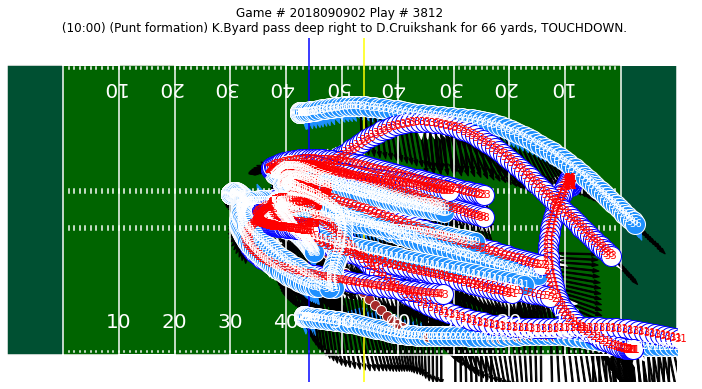

In [146]:
import dateutil
anim = animate_player_movement(1, 3812, 2018090902)

In [147]:
writergif = animation.PillowWriter(fps=12)
anim.save('titans_fk_punt.gif',writer=writergif)

In [ ]:
# insert gif